## HIGH DIMENSIONAL ANALYSIS
### Programming Exercise: 02
### Nguyễn Quốc Bảo - 18110053

# Table of Content
1. Introduction
2. Read data
3. apply Linear Discriminant Analysis
4. comparison between LDA and PCA

# Introduction

The Iris flower data set is a multivariate data set introduced by the British statistician and biologist Ronald Fisher in his 1936 paper The use of multiple measurements in taxonomic problems. It is sometimes called Anderson's Iris data set because Edgar Anderson collected the data to quantify the morphologic variation of Iris flowers of three related species. The data set consists of 50 samples from each of three species of Iris (Iris Setosa, Iris virginica, and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters

#### Apply Linear Discriminant Analysis algorithm on the Iris flower dataset. Make a comparison between LDA and PCA projected samples.

# Import library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Read data

In [2]:
path = './iris.data'
data = pd.read_csv(path,  names=['sepal length', 'sepal width', 'petal length','petal width','label'])
print(data.shape)
data.head()

(150, 5)


,sepal length,sepal width,petal length,petal width,label
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  150 non-null    float64
 1   sepal width   150 non-null    float64
 2   petal length  150 non-null    float64
 3   petal width   150 non-null    float64
 4   label         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
# Check null
data.isnull().sum()

sepal length    0
sepal width     0
petal length    0
petal width     0
label           0
dtype: int64

In [5]:
# split label from dataset
X = data.drop(['label'],axis=1).values
y = data.label.values
X.shape

(150, 4)

In [6]:
#convert các feature từ string sang int
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
y = le.fit_transform(y)


In [7]:
np.unique(y)

array([0, 1, 2])

 # Apply LDA

Mỗi vector trung bình $m_i$ chứa các giá trị trung bình
theo feature $\mu_m$ tương ứng với samples của class i
\begin{equation*}
m_i=\dfrac{1}{n_i}\displaystyle\sum_{x\in D_i}^{c}x_m
\end{equation*}

Ta sẽ tính ma trận phân tán trong class (Within-class
scatter matrix $S_w$):
    \begin{equation*}
        S_{w}=\displaystyle\sum_{i=1}^{c}S_i
    \end{equation*}
Trong đó $S_i$ chính là ma trận phân tán của class i,
được tính như sau:
    \begin{equation*}
        S_i=\displaystyle\sum_{x\in D_i}^{c}(x-m_i)(x-m_i)^{T}
    \end{equation*}

Ta sẽ tính ma trận phân tán giữa các class $S_B$ như sau:\
Với $m$ là mean tổng của tất cả sample của tất cả class
    \begin{equation*}
        S_B=\displaystyle\sum_{i=1}^{c}n_i(m_i-m)(m_i-m)^{T}
    \end{equation*}
Tính vectơ riêng và trị riêng tương ứng của ma trận $S_w^{-1}S_B$.

Sắp xết các trị riêng giảm dần.

Chọn $\textit{k}$ vectơ riêng tương ứng với $\textit{k}$ trị riêng lớn nhất để xây dựng một ma trận chuyển đổi $W$ có $dxk$ chiều.

In [8]:
def Standard_data(X):
    return (X - X.mean(axis = 0))/X.std(axis=0)

In [9]:
class LDA:
    def __init__(self,n_components):
        self.n_components = n_components
    
    def fit_transform(self, X,y):
        n_features = X.shape[1]
        class_labels = np.unique(y)
        
        
        mean_overall = np.mean(X, axis=0)

        
        # within class scatter matrix  SW
        SW = np.zeros((n_features, n_features) )
        
        # Between class scatter SB
        SB = np.zeros((n_features, n_features) )
        
        for c in class_labels:
            X_c = X[y==c]
            
            mean_c = np.mean(X_c, axis=0)

            
            SW += (X_c - mean_c).T.dot((X_c - mean_c))
            
            n_c = X_c.shape[0]
            
            mean_vecs_ = (mean_c - mean_overall).reshape(n_features,1)

            
            SB += n_c * (mean_vecs_).dot(mean_vecs_.T)
        

        
        # Determine SW^-1 *SB
        SW = Standard_data(SW)
        A = np.linalg.inv(SW).dot(SB)

        # get eigenvalues and eigenvectors of SW^-1 * SB
        
        eigvals, eigvecs   = np.linalg.eigh(A)

        
        # sort eigenvalues high to low
        eigvals = eigvals[::-1]
        eigvecs = eigvecs[:,::-1]


        self.eigenvalues = eigvals
        self.eigenvectors = eigvecs
        
        W = eigvecs[:,:self.n_components]

        
        return X.dot(W)
        
        

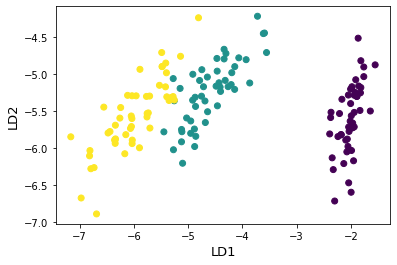

(150, 2)

In [10]:
lda_m = LDA(n_components=2)
X_LDA = lda_m.fit_transform(X ,y)
plt.scatter(X_LDA[:,0],X_LDA[:,1], c=y,
        cmap=plt.cm.get_cmap('viridis', 3))
plt.xlabel('LD1',fontsize=13)
plt.ylabel('LD2',fontsize=13)
plt.show()
X_LDA.shape

# Comparison between LDA and PCA 

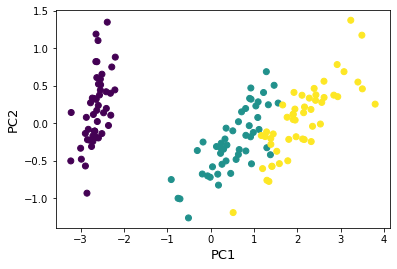

In [11]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
plt.scatter(X_pca[:,0],X_pca[:,1], c = y)
plt.xlabel('PC1',fontsize=13)
plt.ylabel('PC2',fontsize=13)
plt.show()

## Nhận xét:
### Cả LDA và PCA đều là kỹ thuật biến đổi tuyến tính: LDA là một kỹ thuật được giám sát trong khi PCA là không được giám sát - PCA bỏ qua các nhãn lớp. Ngược lại với PCA, LDA cố gắng tìm một không gian con chứa các feature và tối đa hóa khả năng phân tách lớp.